# Набор данных о психическом здоровье
### Изучение ландшафта психического благополучия: Всесторонний анализ набора данных

## О наборе данных
Этот набор данных, по-видимому, содержит множество функций, связанных с анализом текста, анализом настроений и психологическими индикаторами, которые, вероятно, получены из сообщений или текстовых данных. Некоторые функции включают в себя индексы читаемости, такие как автоматический индекс читаемости (ARI), индекс Коулмана Лиау и уровень оценки Флеша-Кинкейда, а также результаты анализа настроений, такие как сложные, отрицательные, нейтральные и положительные оценки. Кроме того, существуют особенности, связанные с психологическими аспектами, такими как экономический стресс, изоляция, употребление психоактивных веществ и бытовой стресс. Набор данных, по-видимому, охватывает широкий спектр лингвистических, психологических и поведенческих характеристик, потенциально пригодных для анализа тем, связанных с психическим здоровьем, в онлайн-сообществах или текстовых данных.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency
print("Setup Complete")

Setup Complete


Этот код считывает CSV-файл с именем "Mental Health Dataset.csv" в объект DataFrame библиотеки pandas с именем `mental_health`. Рассмотрим параметры:

- `pd.read_csv`: Это функция из библиотеки pandas, используемая для чтения данных из CSV-файла.
- `"Mental Health Dataset.csv"`: Это путь к файлу или URL-адрес CSV-файла, который нужно прочитать. Он указывает имя и расположение файла.
- `index_col="Country"`: Этот параметр указывает, что столбец с именем "Country" должен быть использован в качестве индекса DataFrame. Это означает, что значения в столбце "Country" будут использоваться в качестве меток строк.
- `parse_dates=True`: Этот параметр указывает, что pandas должен попытаться разобрать даты в CSV-файле в объекты datetime. Если установлено значение True, pandas автоматически обнаружит и разберет столбцы с датами.

Таким образом, при выполнении этого кода данные из файла "Mental Health Dataset.csv" считываются в объект DataFrame библиотеки pandas с именем `mental_health`, где столбец "Country" используется в качестве индекса, а любые столбцы с датами разбираются в объекты datetime.

In [6]:
# Считывает файл в переменную my_data
mental_health = pd.read_csv( "Mental Health Dataset.csv", index_col="Country", parse_dates=True)

/var/folders/nv/rb1zm3m14hx2v9m2qxpb437h0000gn/T/ipykernel_27267/1629092369.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mental_health = pd.read_csv( "Mental Health Dataset.csv", index_col="Country", parse_dates=True)


In [7]:
# Изучите набор данных
mental_health

,Timestamp,Gender,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
Country,,,,,,,,,,,,,,,,
United States,8/27/2014 11:29,Female,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
United States,8/27/2014 11:31,Female,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
United States,8/27/2014 11:32,Female,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
United States,8/27/2014 11:37,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
United States,8/27/2014 11:43,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,7/27/2015 23:25,Male,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
South Africa,8/17/2015 9:38,Male,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
United States,8/25/2015 19:59,Male,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No


In [8]:
# Перечислить все столбцы в наборе данных
columns_list = mental_health.columns

# Распечатать список имен столбцов
print(columns_list)

Index(['Timestamp', 'Gender', 'Occupation', 'self_employed', 'family_history',
       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')


In [9]:
# Проверьте, нет ли пропущенных значений в каждом столбце
missing_values_count = mental_health.isnull().sum()

# Выведите количество пропущенных значений для каждого столбца
print(missing_values_count)

Timestamp                     0
Gender                        0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


Этот код удаляет строки из DataFrame `mental_health`, в которых значение столбца 'self_employed' является отсутствующим (NaN). Метод `dropna()` принимает параметр `subset=['self_employed']`, что означает, что строки будут удалены только в тех случаях, когда отсутствует значение в столбце 'self_employed'.

In [10]:
# Удалить строки с отсутствующими значениями self_employed
mental_health = mental_health.dropna(subset=['self_employed'])

In [11]:
# Проверьте, нет ли пропущенных значений в каждом столбце
missing_values_count = mental_health.isnull().sum()

# Выведите количество пропущенных значений для каждого столбца
print(missing_values_count)

Timestamp                  0
Gender                     0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


Этот код создает переменную gender_distribution, которая содержит подсчет количества значений в столбце 'Gender' из DataFrame mental_health. Затем он выводит распределение половых групп, печатая переменную gender_distribution.

In [13]:
# Шаг 1: Проанализируйте распределение по полам
gender_distribution = mental_health['Gender'].value_counts()
print("Gender Distribution:\n", gender_distribution)

Gender Distribution:
 Gender
Male      235950
Female     51212
Name: count, dtype: int64


Этот код использует функцию `pd.crosstab()` для создания таблицы сопряженности между столбцами "Gender" и "treatment" из DataFrame `mental_health`. Результат сохраняется в переменной `treatment_by_gender`.

In [14]:
# Шаг 2: Изучите взаимосвязь между полом и обращением за медицинской помощью.
treatment_by_gender = pd.crosstab(mental_health['Gender'], mental_health['treatment'])
print("\nTreatment by Gender:\n", treatment_by_gender)


Treatment by Gender:
 treatment      No     Yes
Gender                   
Female      16058   35154
Male       126360  109590


Этот код вычисляет пропорции в распределении значений в таблице `treatment_by_gender`. Для этого каждое значение в строках делится на сумму значений в этой строке. Результат сохраняется в переменной `treatment_by_gender_proportions`.

In [18]:
# Рассчитайте соотношение обращений за медицинской помощью в разбивке по полу для более четкого сравнения.
treatment_by_gender_proportions = treatment_by_gender.div(treatment_by_gender.sum(1), axis=0)
print("\nProportions of Treatment by Gender:\n", treatment_by_gender_proportions)


Proportions of Treatment by Gender:
 treatment        No       Yes
Gender                       
Female     0.313559  0.686441
Male       0.535537  0.464463


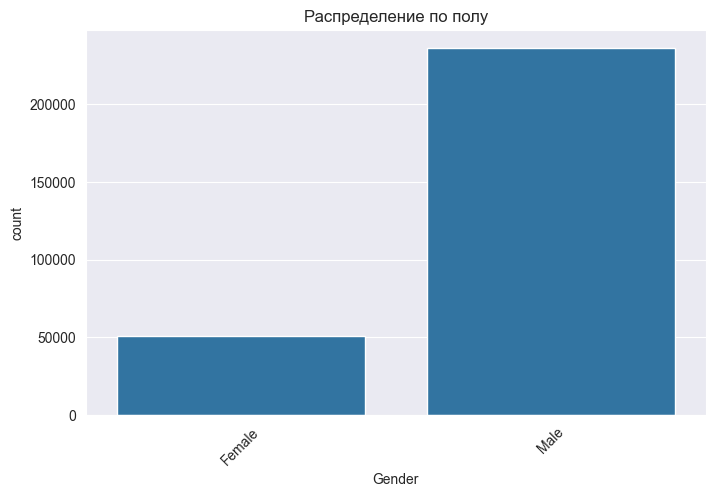

In [23]:
# Гендер и психическое здоровье: как различаются проблемы психического здоровья у разных полов? 
# Чаще ли представители определенного пола обращаются за лечением?
# Шаг 3: Визуализируйте результаты
# Составьте график гендерного распределения
plt.figure(figsize=(8, 5))
sns.countplot(data=mental_health, x='Gender')
plt.title('Распределение по полу')
plt.xticks(rotation=45)
plt.show()

Этот код создает столбчатую диаграмму, на которой каждый столбец представляет собой долю каждого типа лечения (таких как "да" или "нет") для каждого пола (мужчины и женщины). Параметр `stacked=True` позволяет отображать столбцы для каждого значения переменной `treatment` на одном столбце, что удобно для сравнения пропорций между гендерами.

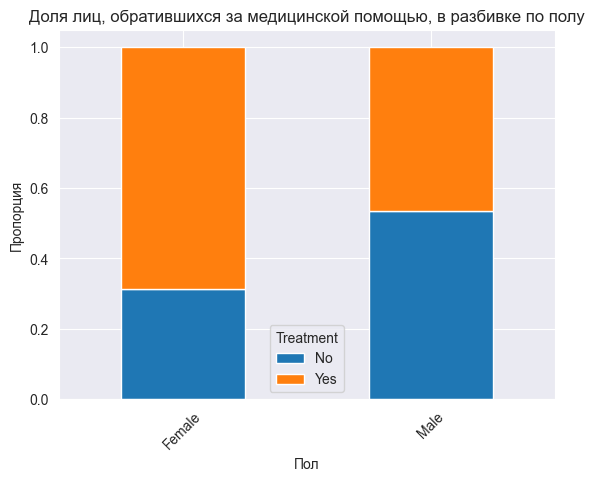

In [25]:
# Построение графика соотношения лиц, обращающихся за лечением, в разбивке по полу.
treatment_by_gender_proportions.plot(kind='bar', stacked=True)
plt.title('Доля лиц, обратившихся за медицинской помощью, в разбивке по полу')
plt.ylabel('Пропорция')
plt.xlabel('Пол')
plt.xticks(rotation=45)
plt.legend(title='Treatment', labels=['No', 'Yes'])
plt.show()

Этот код использует функцию `chi2_contingency` из модуля `scipy.stats` для вычисления значения критерия хи-квадрат (chi2), p-значения (p), степеней свободы (dof) и ожидаемых частот (expected) для таблицы сопряженности `occupation_treatment_ct`. Критерий хи-квадрат используется для определения статистической зависимости между двумя категориальными переменными, такими как профессия и тип лечения.

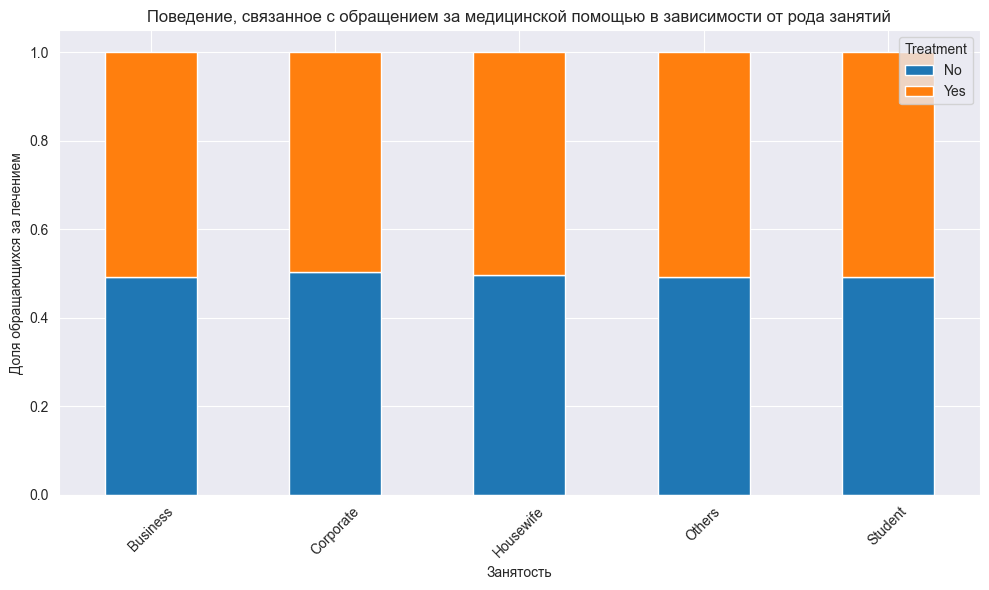

Chi-square Statistic: 19.911216357502553, p-value: 0.0005199610301812904


In [27]:
# Существует ли взаимосвязь между родом занятий человека 
# и состоянием его психического здоровья или поведением при обращении за медицинской помощью?

# Шаг 1: Составление перекрестной таблицы
occupation_treatment_ct = pd.crosstab(mental_health['Occupation'], mental_health['treatment'])

# Шаг 2: Визуализация
# Преобразуйте количество в пропорции для лучшего сравнения
occupation_treatment_prop = occupation_treatment_ct.div(occupation_treatment_ct.sum(1), axis=0)
occupation_treatment_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Поведение, связанное с обращением за медицинской помощью в зависимости от рода занятий')
plt.xlabel('Занятость')
plt.ylabel('Доля обращающихся за лечением')
plt.legend(title='Treatment', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Шаг 3: Статистический тест (критерий Хи-квадрат)
chi2, p, dof, expected = chi2_contingency(occupation_treatment_ct)
print(f"Chi-square Statistic: {chi2}, p-value: {p}")

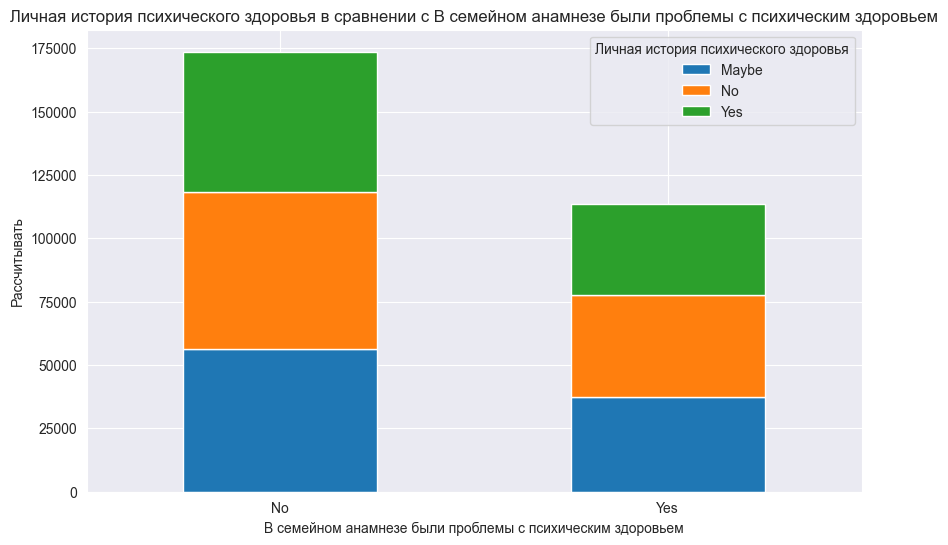

In [31]:
# Как наличие в семейном анамнезе проблем с психическим здоровьем влияет на 
# какова вероятность того, что человек столкнется с подобными проблемами или обратится за лечением?

# Проанализируйте взаимосвязь между семейной историей и личной историей психического здоровья.
cross_tab_history = pd.crosstab(mental_health['family_history'], mental_health['Mental_Health_History'])

# Проанализируйте взаимосвязь между семейным анамнезом и поведением, связанным с обращением за медицинской помощью.
cross_tab_treatment = pd.crosstab(mental_health['family_history'], mental_health['treatment'])

# Визуализируйте взаимосвязь между семейной историей и личной историей психического здоровья.
cross_tab_history.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Личная история психического здоровья в сравнении с В семейном анамнезе были проблемы с психическим здоровьем')
plt.xlabel('В семейном анамнезе были проблемы с психическим здоровьем')
plt.ylabel('Рассчитывать')
plt.xticks(rotation=0)
plt.legend(title='Личная история психического здоровья')
plt.show()

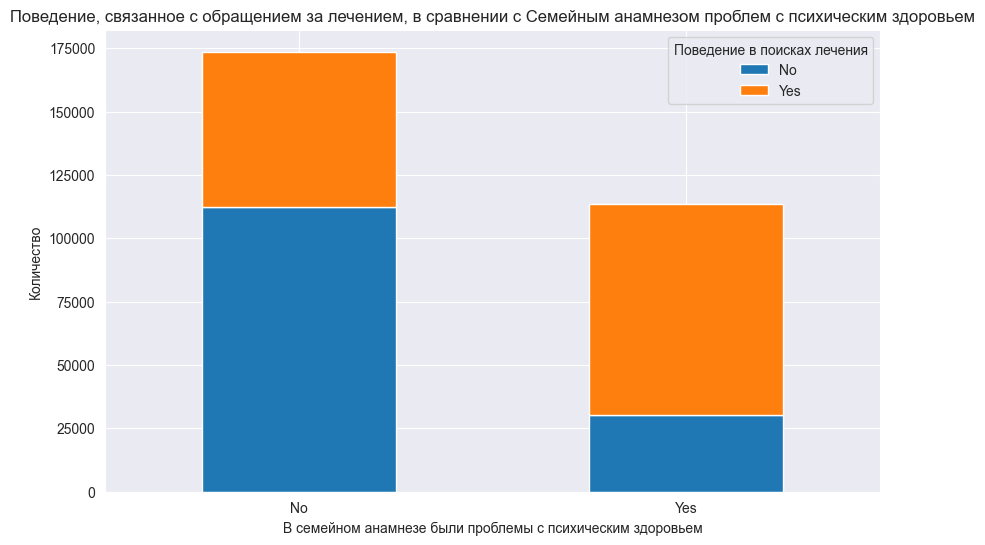

In [30]:
# Визуализируйте взаимосвязь между семейным анамнезом и поведением, связанным с обращением за медицинской помощью.
cross_tab_treatment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Поведение, связанное с обращением за лечением, в сравнении с Семейным анамнезом проблем с психическим здоровьем')
plt.xlabel('В семейном анамнезе были проблемы с психическим здоровьем')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.legend(title='Поведение в поисках лечения')
plt.show()

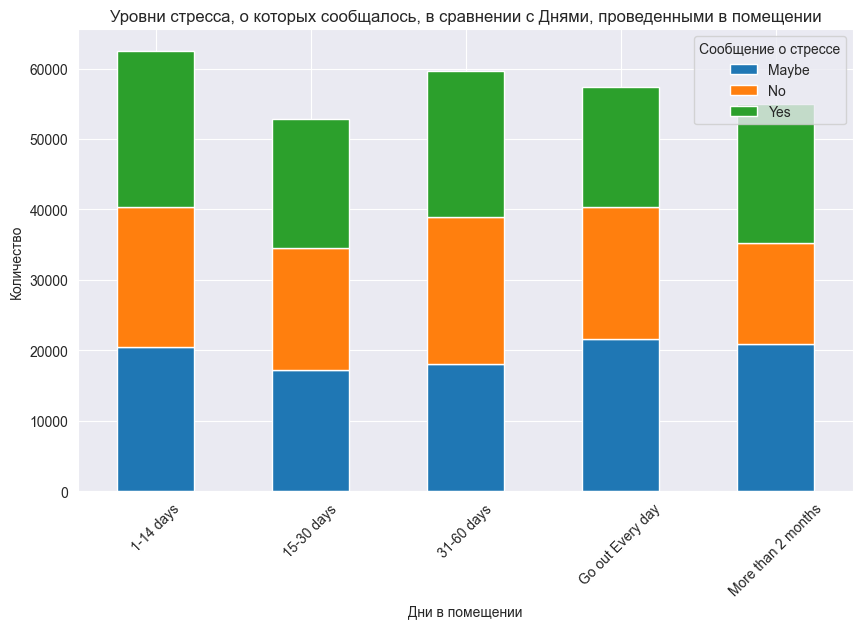

In [32]:
# Связано ли увеличение количества дней, проведенных в помещении, с 
# более высоким уровнем стресса или изменениями в привычках, связанных с психическим здоровьем?

# Проанализируйте взаимосвязь между днями, проведенными в помещении, и ростом стресса
cross_tab_stress = pd.crosstab(mental_health['Days_Indoors'], mental_health['Growing_Stress'])

# Analyze the relationship between days indoors and changes in habits
cross_tab_habits = pd.crosstab(mental_health['Days_Indoors'], mental_health['Changes_Habits'])

# Визуализируйте взаимосвязь между днями, проведенными в помещении, и растущим стрессом.
cross_tab_stress.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Уровни стресса, о которых сообщалось, в сравнении с Днями, проведенными в помещении')
plt.xlabel('Дни в помещении')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend(title='Сообщение о стрессе')
plt.show()

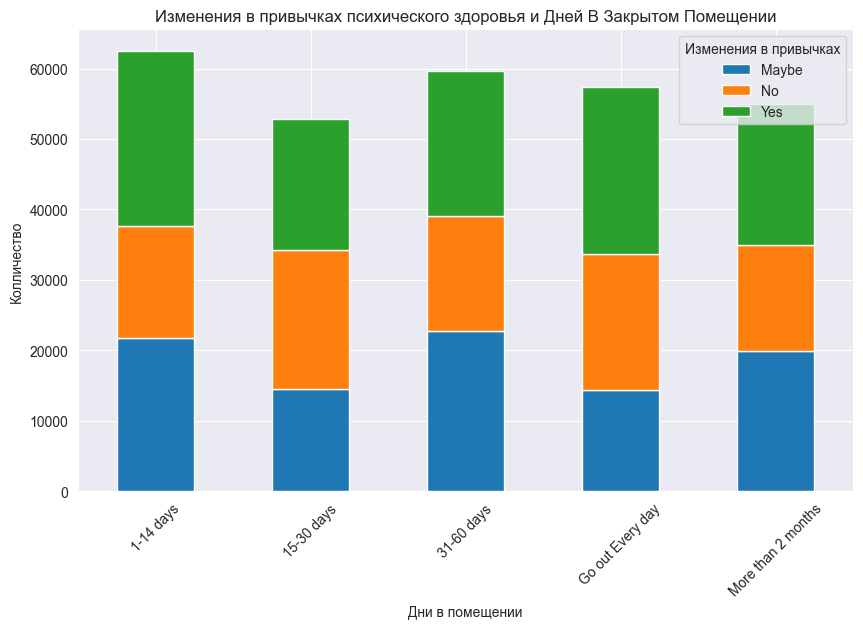

In [34]:
# Визуализируйте взаимосвязь между днями, проведенными в помещении, и изменениями в привычках.
cross_tab_habits.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Изменения в привычках психического здоровья и Дней В Закрытом Помещении')
plt.xlabel('Дни в помещении')
plt.ylabel('Колличество')
plt.xticks(rotation=45)
plt.legend(title='Изменения в привычках')
plt.show()